In [8]:
import pandas as pd

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_idena = pd.read_csv('../idena_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df_idena.set_index(["Date"], drop=False, inplace=True)

C:\Users\Predrag\AppData\Local\Temp\ipykernel_796\4039884083.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [9]:
from python_scripts.sarima_helper import create_lagged_value_columns

df_idena.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']
windows = [3,7,14,21,30,60]
df = create_lagged_value_columns(lag_features, windows, df_idena)

C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\python_scripts\sarima_helper.py:48: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


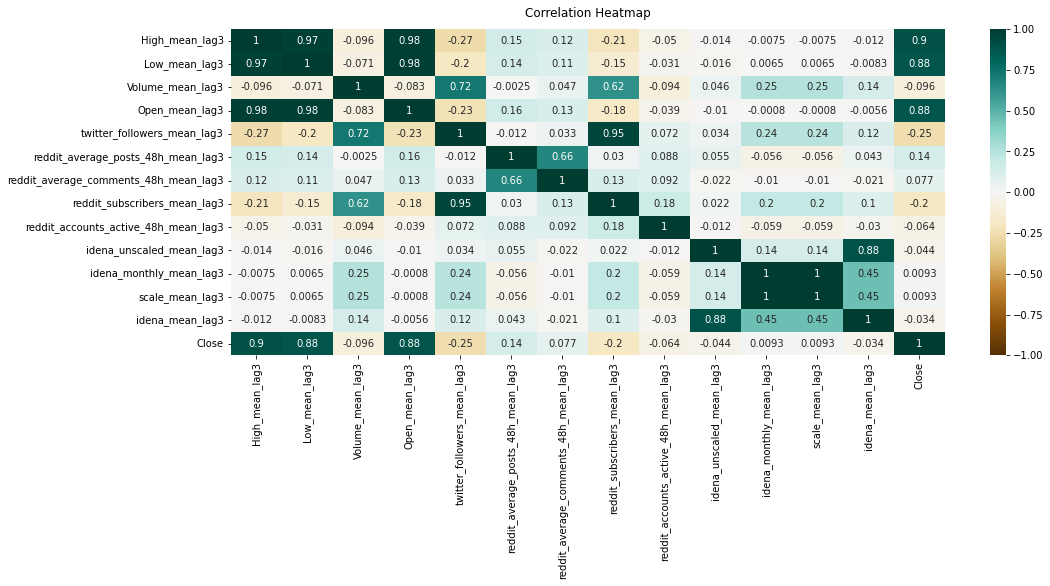

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[0]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../heatmap_idena_v1.png', dpi=300, bbox_inches='tight')

In [11]:
from python_scripts.sarima_helper import remove_lagged_features_with_window_time

features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low']

remove_lagged_features_with_window_time(windows[0], features_to_remove, df, lag_features)

In [12]:
df.to_csv('../idena_3d_lag.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

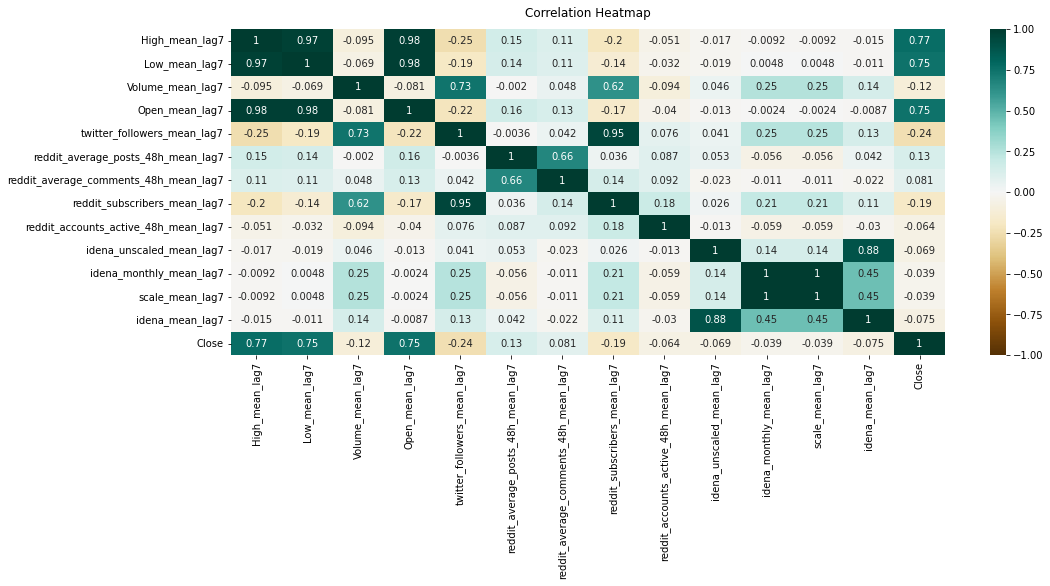

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[1]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [14]:
features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low']

remove_lagged_features_with_window_time(windows[1], features_to_remove, df, lag_features)
df.to_csv('../idena_7d_lag.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

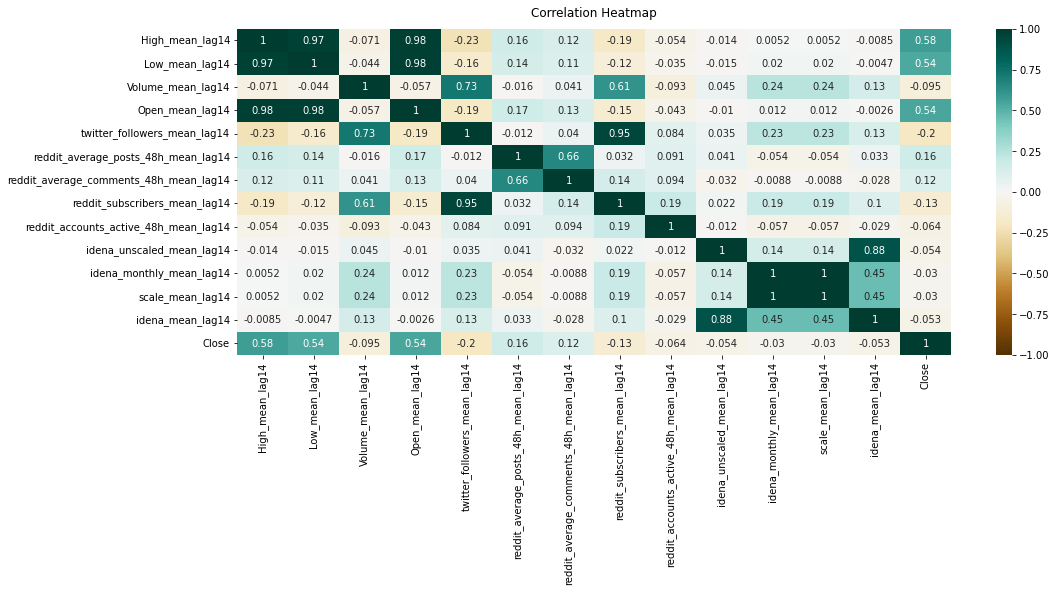

In [15]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[2]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [16]:
features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low', 'Open']

remove_lagged_features_with_window_time(windows[2], features_to_remove, df, lag_features)
df.to_csv('../idena_14d_lag.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

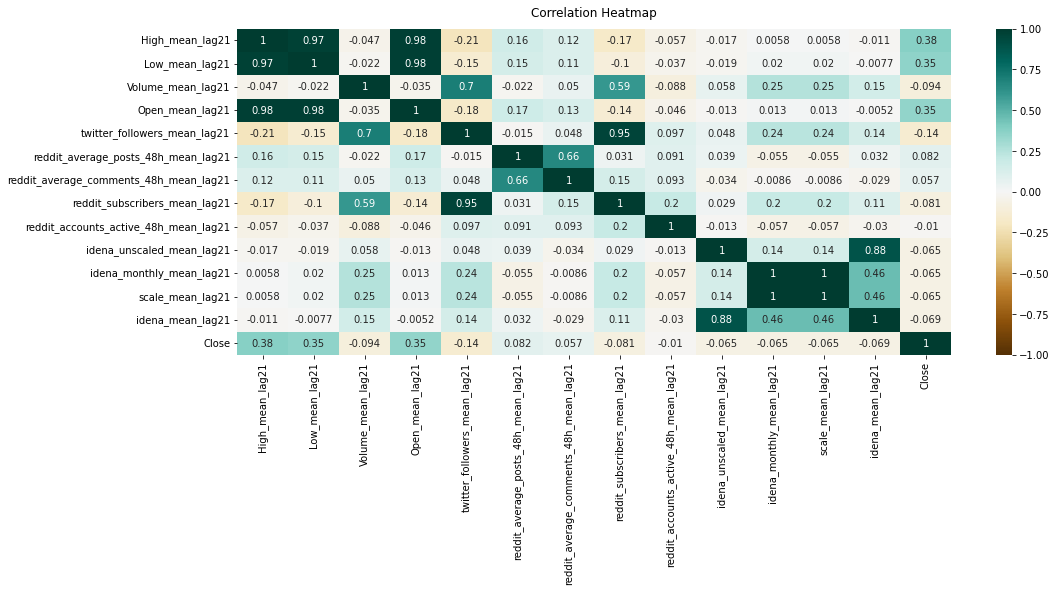

In [17]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[3]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [18]:
features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low', 'Open']

remove_lagged_features_with_window_time(windows[3], features_to_remove, df, lag_features)
df.to_csv('../idena_21d_lag.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

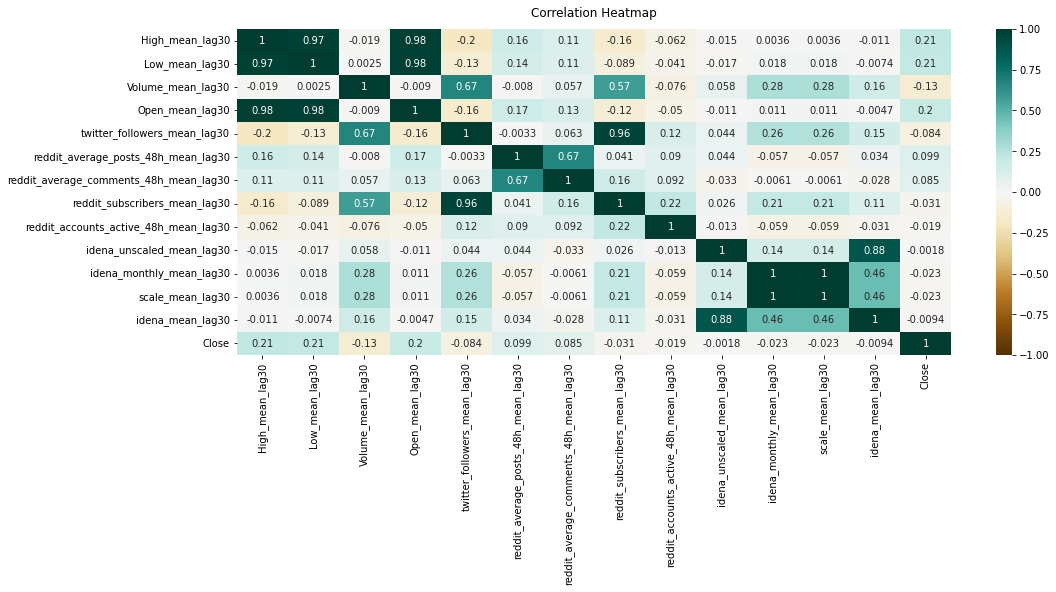

In [19]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[4]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [20]:
features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low', 'Open']

remove_lagged_features_with_window_time(windows[4], features_to_remove, df, lag_features)
df.to_csv('../idena_30d_lag.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

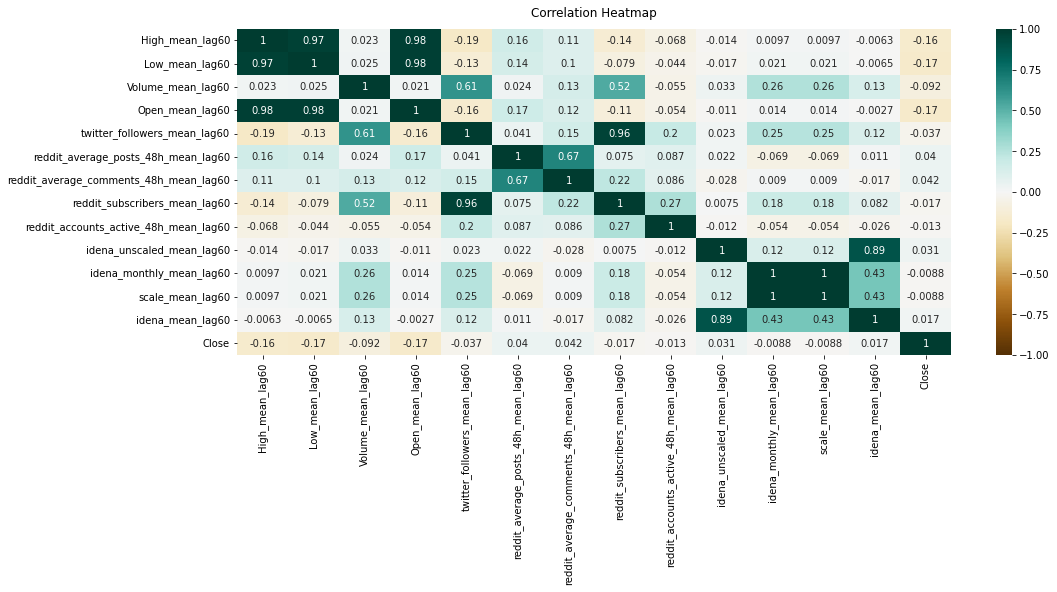

In [21]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[5]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [22]:
features_to_remove = ['Volume', 'twitter_followers', 'reddit_average_posts_48h', 'reddit_average_comments_48h',
                      'reddit_subscribers', 'reddit_accounts_active_48h', 'idena_unscaled', 'idena_monthly', 'scale',
                      'idena', 'High', 'Low', 'Open']

remove_lagged_features_with_window_time(windows[5], features_to_remove, df, lag_features)
df.to_csv('../idena_60d_lag.csv')

In [26]:
# Korelacija za lagovane vrednosti dogecoina
df = pd.read_csv('../doge_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df.set_index(["Date"], drop=False, inplace=True)

C:\Users\Predrag\AppData\Local\Temp\ipykernel_796\4039884083.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [27]:
windows = [3, 7, 14, 21, 30, 60]
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]
df = create_lagged_value_columns(lag_features, windows, df)

C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\python_scripts\sarima_helper.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_mean_lag{window}"] = df[feature].shift(window)
C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\python_scripts\sarima_helper.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_mean_lag{window}"] = df[feature].shift(window)
C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\python_scripts\sarima_helper.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

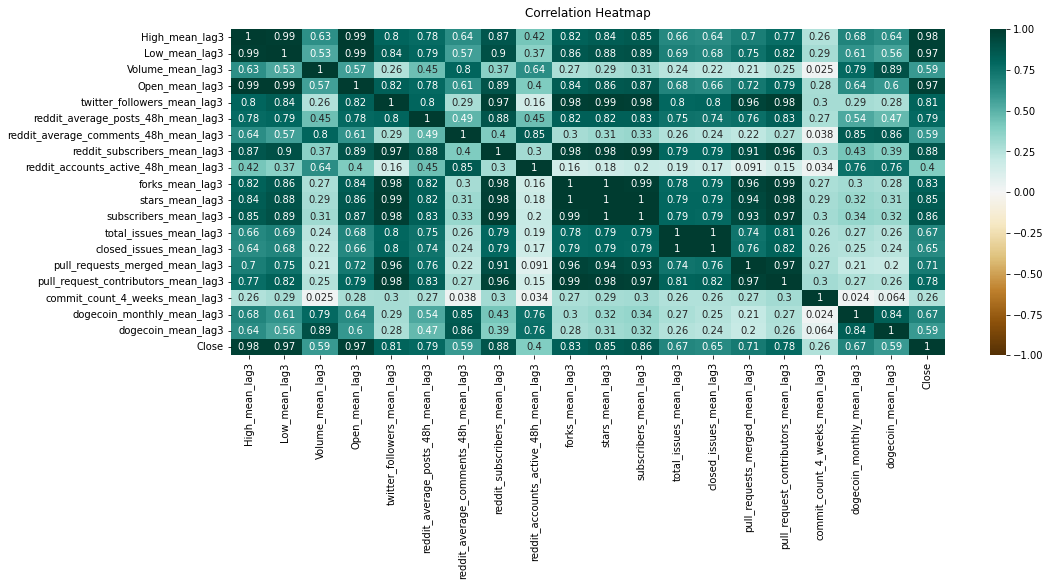

In [28]:
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[0]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [29]:
features_to_remove = ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h','commit_count_4_weeks',
               'dogecoin', 'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars', 'subscribers', 'total_issues',
               'pull_requests_merged']

remove_lagged_features_with_window_time(windows[0], features_to_remove, df, lag_features)
df.to_csv('../doge_3d_lag.csv')

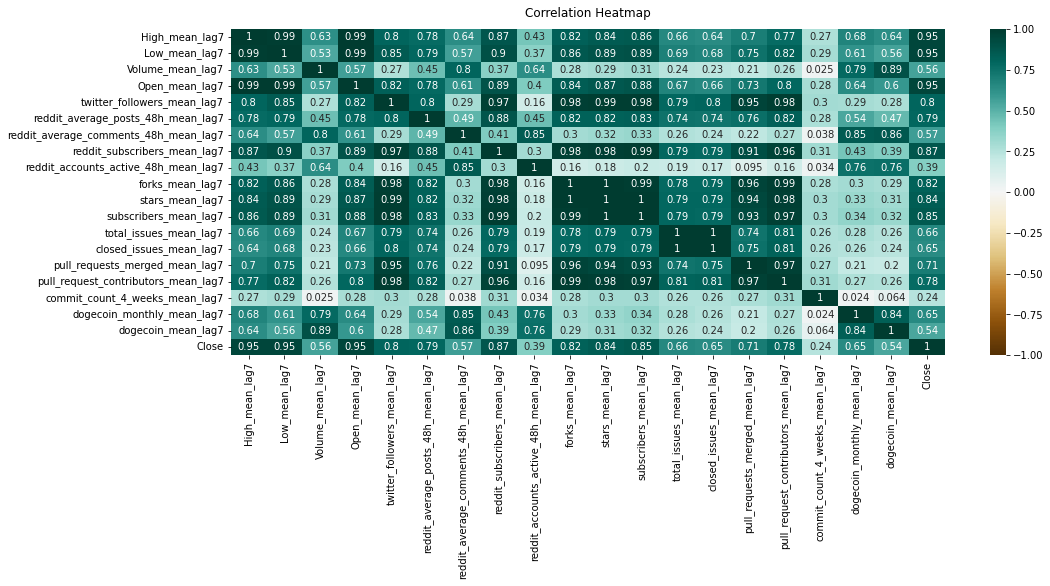

In [31]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[1]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [32]:
features_to_remove = ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'commit_count_4_weeks',
                      'dogecoin', 'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars',
                      'subscribers', 'total_issues', 'pull_requests_merged']

remove_lagged_features_with_window_time(windows[1], features_to_remove, df, lag_features)
df.to_csv('../doge_7d_lag.csv')

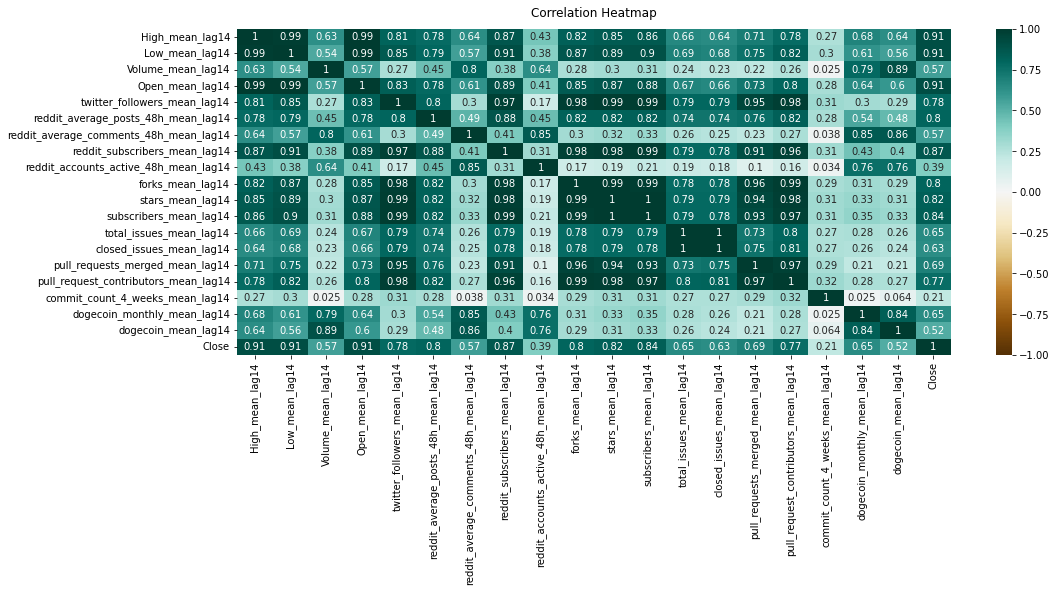

In [33]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[2]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [34]:
features_to_remove = ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'commit_count_4_weeks',
                      'dogecoin', 'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars',
                      'subscribers', 'total_issues', 'pull_requests_merged']

remove_lagged_features_with_window_time(windows[2], features_to_remove, df, lag_features)
df.to_csv('../doge_14d_lag.csv')

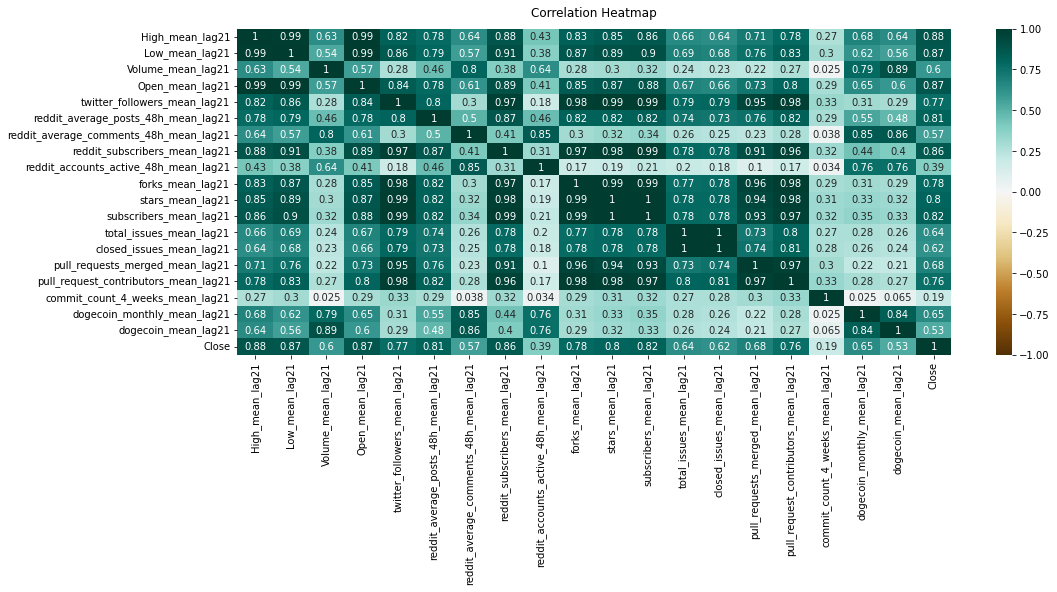

In [35]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[3]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [36]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'commit_count_4_weeks',
                      'dogecoin', 'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars',
                      'subscribers', 'total_issues', 'pull_requests_merged']

remove_lagged_features_with_window_time(windows[3], features_to_remove, df, lag_features)
df.to_csv('../doge_21d_lag.csv')

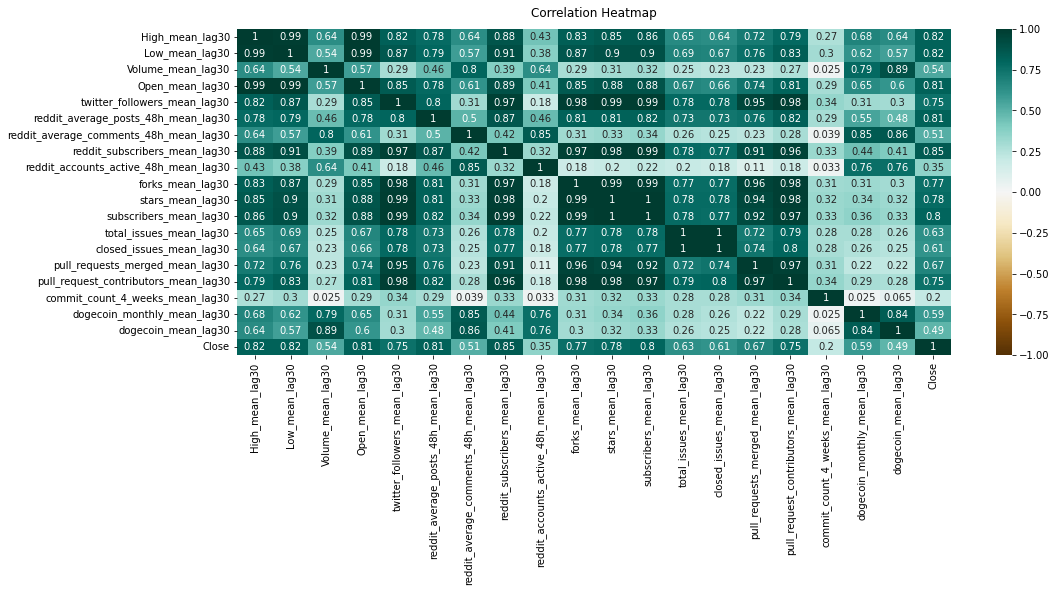

In [37]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[4]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [38]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'commit_count_4_weeks',
                      'dogecoin', 'dogecoin_monthly', 'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars',
                      'subscribers', 'total_issues', 'pull_requests_merged']

remove_lagged_features_with_window_time(windows[4], features_to_remove, df, lag_features)
df.to_csv('../doge_30d_lag.csv')

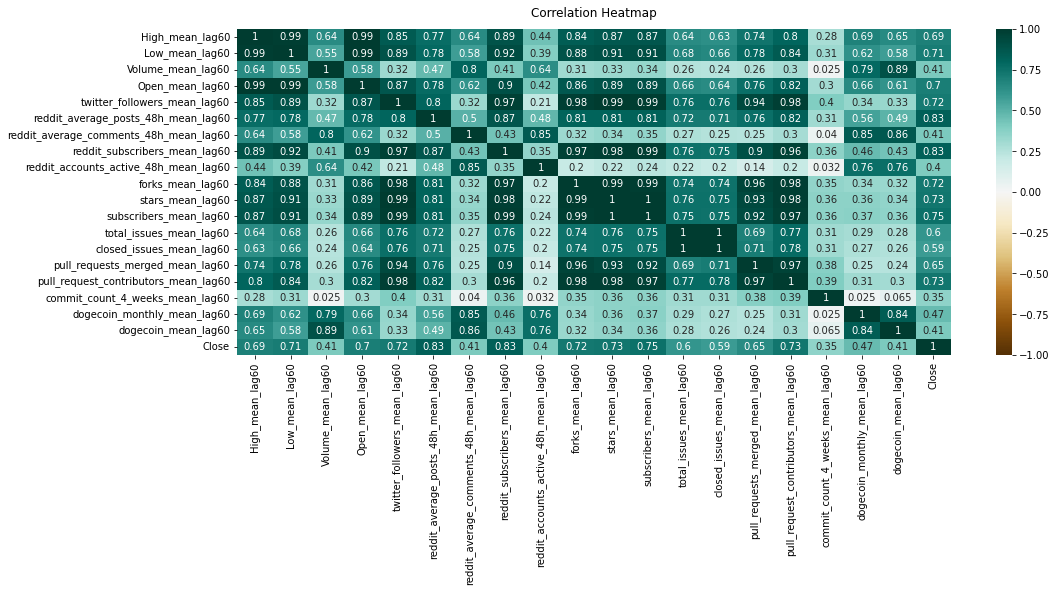

In [39]:
lag_features = ["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", "forks", "stars",
                "subscribers", "total_issues", "closed_issues", "pull_requests_merged", "pull_request_contributors",
                "commit_count_4_weeks", "dogecoin_monthly", "dogecoin"]

exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[5]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [40]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'closed_issues', 'commit_count_4_weeks',
                      'dogecoin', 'dogecoin_monthly',   'High', 'Low', 'twitter_followers', 'reddit_subscribers', 'forks', 'stars',
                      'subscribers', 'total_issues', 'pull_requests_merged']

remove_lagged_features_with_window_time(windows[5], features_to_remove, df, lag_features)
df.to_csv('../doge_60d_lag.csv')

In [41]:
#Analiza kroelaicje za shiba inu
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../shiba_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df.set_index(["Date"], drop=False, inplace=True)

C:\Users\Predrag\AppData\Local\Temp\ipykernel_796\703430118.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [42]:
from python_scripts.sarima_helper import create_lagged_value_columns

df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
windows = [3,7,14,21,30,60]
df = create_lagged_value_columns(lag_features, windows, df)

C:\Users\Predrag\Desktop\SIAP\ProjectSiap2021\python_scripts\sarima_helper.py:48: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


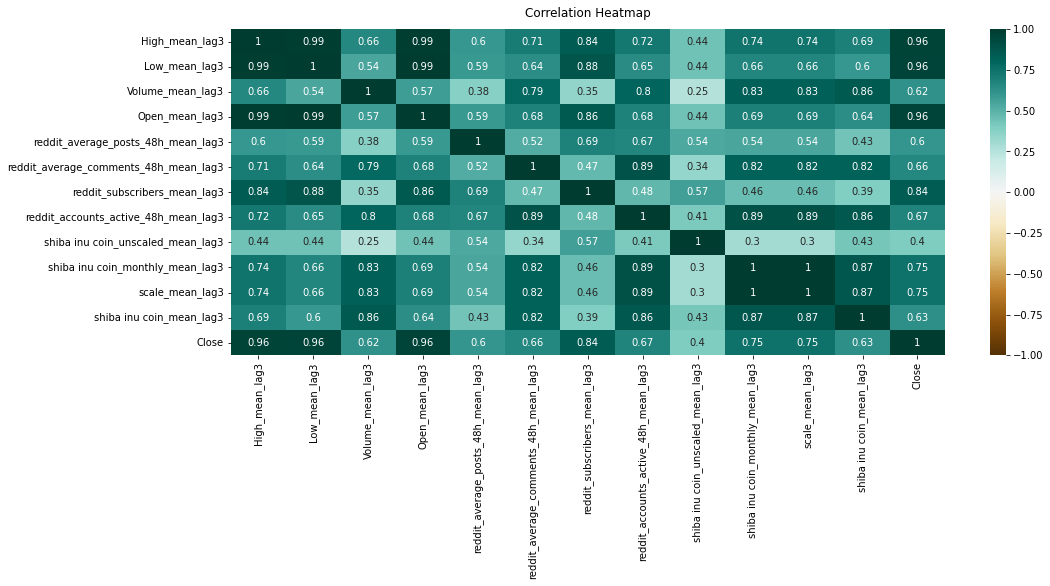

In [43]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[0]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [44]:
features_to_remove =  ['shiba inu coin_unscaled', 'High', 'Low', 'shiba inu coin_monthly']

remove_lagged_features_with_window_time(windows[0], features_to_remove, df, lag_features)
df.to_csv('../shiba_3d_lag.csv')

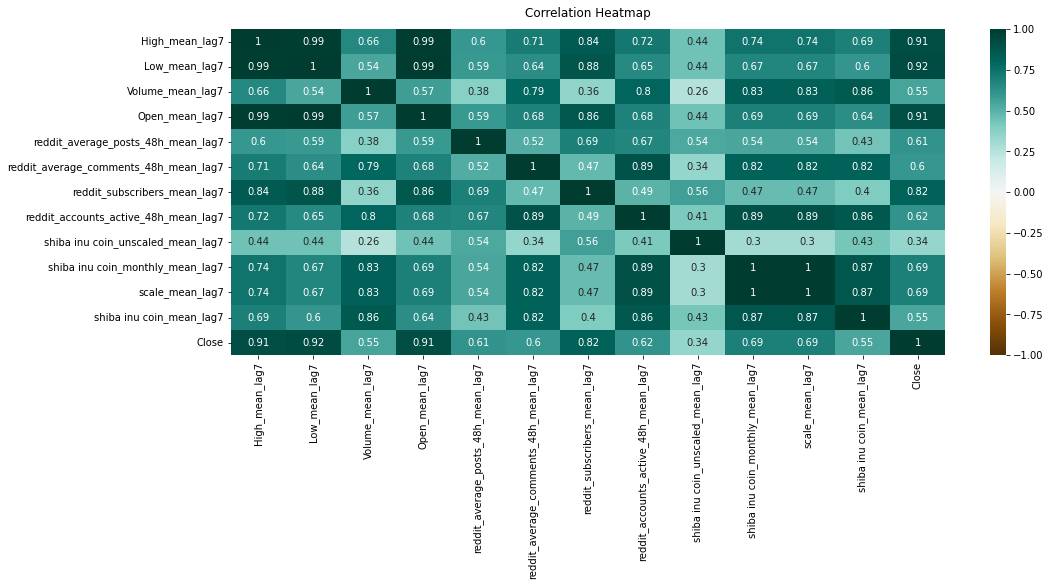

In [45]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[1]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [46]:
features_to_remove =  ['Volume', 'shiba inu coin_unscaled', 'shiba inu coin', 'High', 'Low', 'shiba inu coin_monthly']

remove_lagged_features_with_window_time(windows[1], features_to_remove, df, lag_features)
df.to_csv('../shiba_7d_lag.csv')

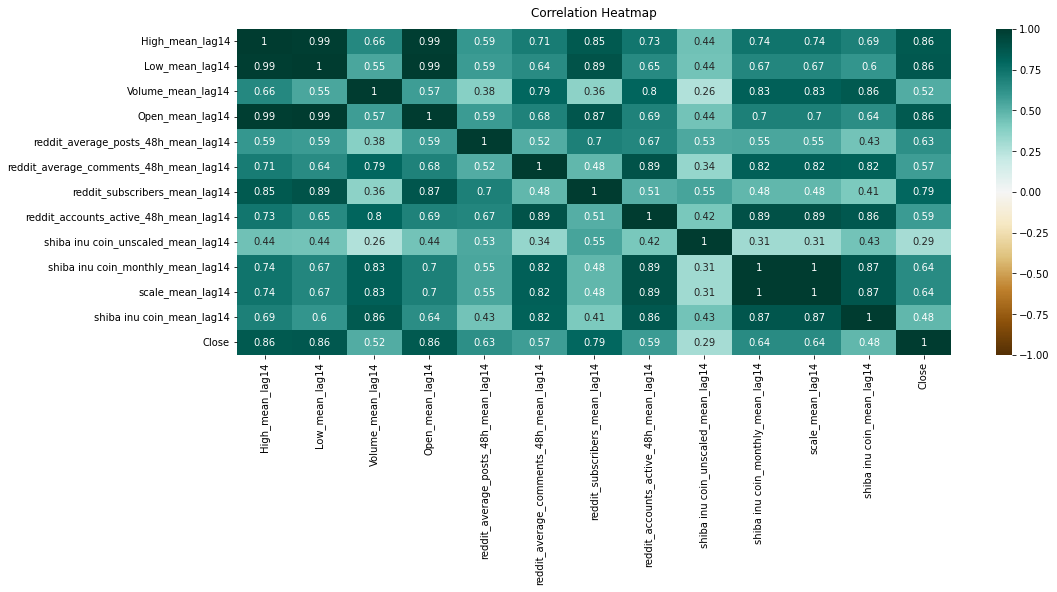

In [47]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[2]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [48]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'shiba inu coin_unscaled', 'shiba inu coin', 'High', 'Low', 'shiba inu coin_monthly']

remove_lagged_features_with_window_time(windows[2], features_to_remove, df, lag_features)
df.to_csv('../shiba_14d_lag.csv')

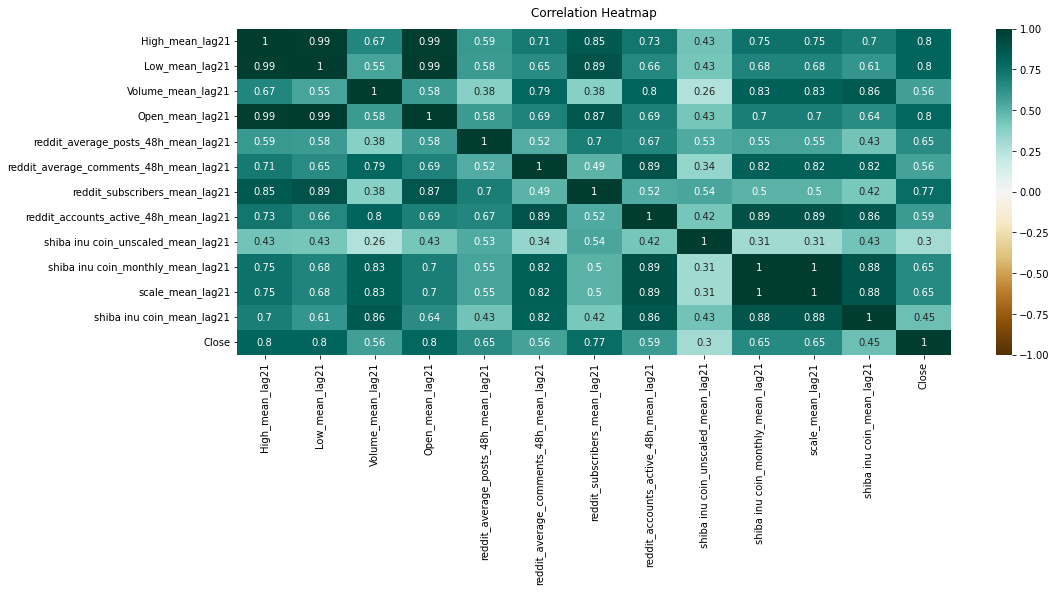

In [50]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[3]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [51]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'shiba inu coin_unscaled', 'shiba inu coin', 'High', 'Low', 'shiba inu coin_monthly']

remove_lagged_features_with_window_time(windows[3], features_to_remove, df, lag_features)
df.to_csv('../shiba_21d_lag.csv')

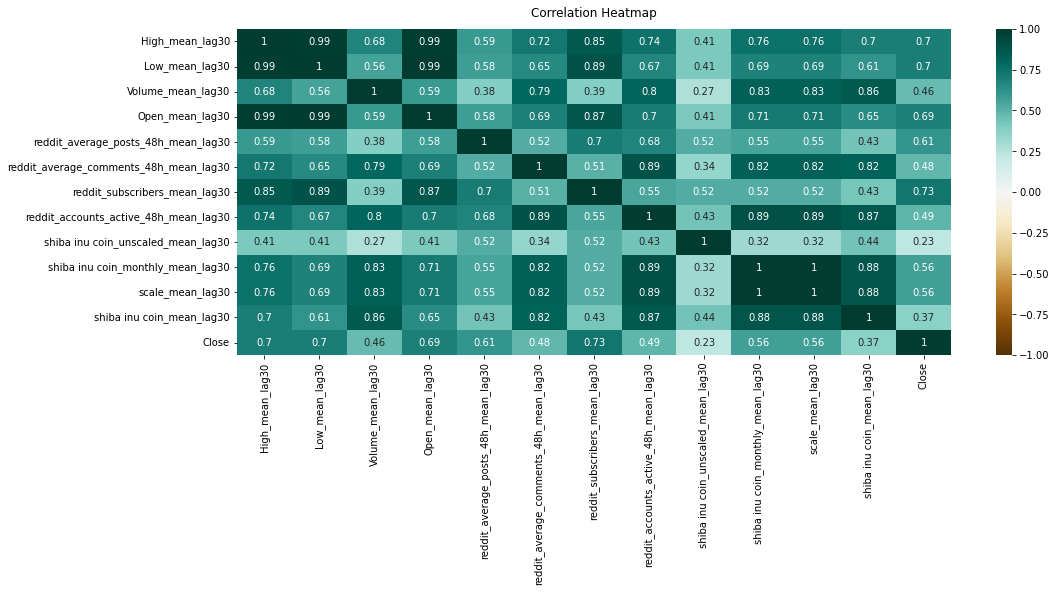

In [52]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[4]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [54]:
features_to_remove =  ['Volume', 'reddit_average_comments_48h', 'reddit_accounts_active_48h', 'shiba inu coin_monthly', 'scale', 'shiba inu coin_unscaled', 'shiba inu coin', 'High', 'Low']

remove_lagged_features_with_window_time(windows[4], features_to_remove, df, lag_features)
df.to_csv('../shiba_30d_lag.csv')

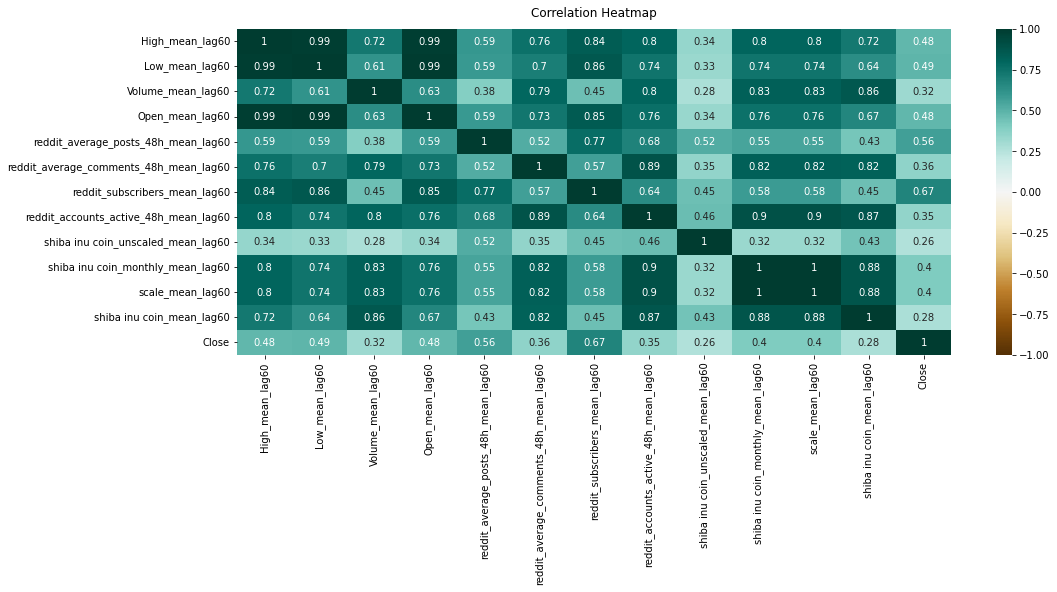

In [55]:
lag_features = ["High", "Low", "Volume", "Open", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h",
                'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']
exogs= []
for feature in lag_features:
    exogs.append(f"{feature}_mean_lag{windows[5]}")
exogs.append('Close')
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[exogs].corr(), cmap='BrBG', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [58]:
features_to_remove =  ['High', 'Low', 'Volume', 'Open', 'reddit_average_posts_48h', 'reddit_average_comments_48h', 'reddit_accounts_active_48h',
                       'shiba inu coin_unscaled', 'shiba inu coin_monthly', 'scale', 'shiba inu coin']

remove_lagged_features_with_window_time(windows[5], features_to_remove, df, lag_features)
df.to_csv('../shiba_60d_lag.csv')